## 예제 8-5-1 두 그릇에 있는 쿠기에 대한 베이즈안 처리 알아보기

## 참고자료

https://ratsgo.github.io/statistics/2017/07/01/bayes/

##  사이파이 예시

쿠키가 들어 있는 그릇 두 개가 있다고 가정해보겠습니다. 첫번째 그릇에는 바닐라 쿠키 30개와 초콜렛 쿠키 10개가 들어있고, 두번째 그릇에는 두 가지 쿠키가 종류별로 20개씩 들어 있습니다.

어떤 그릇인지 보지 않고 한 그릇에서 임의로 쿠키를 집었는데 바닐라 쿠키였다고 칩시다. 그렇다면 이 때 ‘이 바닐라 쿠키가 그릇 1에서 나왔을 가능성’은 얼마일까요? 사실 이 확률을 계산하기는 쉽지 않습니다.

그런데 ‘그릇1에서 바닐라 쿠키가 나올 확률’은 30/40으로 구하기 쉽습니다. 베이즈 규칙을 활용해 조건절과 결과절을 바꾸어 원하는 확률을 구해보겠습니다. 저 아래 표의 첫번째 열을 기준으로 계산한 식과 용어 설명은 다음과 같습니다.

P(H|D)=P(H)P(D|H)P(D)=1/2×3/4 // 5/8=3/ 5

# lea 이산확률 모듈

https://bitbucket.org/piedenis/lea/wiki/Lea3_Tutorial_1

## 
https://bitbucket.org/piedenis/lea/wiki/Lea3_Tutorial_2

##  
https://bitbucket.org/piedenis/lea/wiki/Lea3_Tutorial_3

In [1]:
import lea                  
import numpy as np

In [37]:
import lea                         ## 이산확률 모듈을 사용한다 

## 사전 확률 

P(H)  : 어떤 쿠키를 골랐던지 상관없이 그릇1을 골랐을 확률. 문제에서는 그릇을 임의로 선택한 것이므로 0.5라고 가정할 수 있습니다.
    이를 데이터를 보기 전의 가설의 확률, 즉 사전확률입니다.

In [2]:
bowl = lea.vals("bowl1","bowl2",prob_type='r')            ## 두 개의 그릇에 대한 확률을 만든다. 

In [3]:
bowl

bowl1 : 1/2
bowl2 : 1/2

In [4]:
bowl.p('bowl1')

1/2

## 우도 

P(D|H) : 그릇1에서 바닐라 쿠키가 나올 확률. 3/4입니다. 이를 데이터가 가설에 포함될 확률, 즉 우도입니다.

In [5]:
bowl1 = lea.pmf({"V":30,"C":10}, prob_type='r')            ## 첫번째 그릇에 들어간 쿠키의 확률을 만든다 

In [6]:
bowl1 

C : 1/4
V : 3/4

In [7]:
bowl1 .p_sum

1

In [8]:
bowl1 .p('V')

3/4

In [9]:
bowl1 .p('C')

1/4

In [10]:
bowl2 = lea.pmf({"V":20, "C":20}, prob_type='r')          ## 두번째 그룻의 쿠키에 대한 확률을 만든다. 

In [11]:
bowl2

C : 1/2
V : 1/2

##  확률분포

In [12]:
import pandas as pd

In [13]:
data = { 'bowl1':bowl1.ps, 'bowl2': bowl2.ps}

In [14]:
data

{'bowl1': (1/4, 3/4), 'bowl2': (1/2, 1/2)}

In [15]:
df = pd.DataFrame(data,index=["chocolate","vanilla"])          ## 확률 분포표를 만든다. 

In [16]:
df

,bowl1,bowl2
chocolate,1/4,1/2
vanilla,3/4,1/2


In [17]:
df_ = df.astype('float')                                   ## 시각화하기 위해 분수를 실수로 변환한다. 

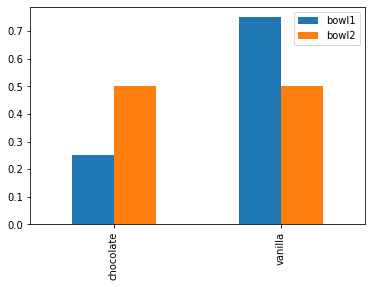

In [18]:
df_.plot(kind='bar')

## 한정상수 

P(D) : 바닐라 쿠키를 고를 확률입니다. 각 그릇을 고를 확률이 동일하고 그릇에 동일한 쿠키가 들어있으므로 어떤 그릇을 택하든 바닐라 쿠키를 고를 확률도 같습니다. 두 그릇에 50개 바닐라 쿠키와 30개의 초콜렛 쿠키가 들어있으므로 P(V)는 5/8이 됩니다. 이를 어떤 가설에든 포함되는 데이터의 비율, 즉 한정상수입니다

In [19]:
cookie = lea.pmf({'vanilla':50, 'chocolate':30},prob_type='r' )         ## 전체 쿠기에 대한 확률을 만든다. 

In [20]:
cookie

chocolate : 3/8
vanilla   : 5/8

In [21]:
cookie.p('vanilla')

5/8

## 사후확률

P(H |D) : 바닐라 쿠키가 그릇1에서 나왔을 확률. 우리가 알고 싶은 확률입니다. 이를 데이터를 확인한 이후의 가설 확률, 즉 사후확률입니다. 이는 베이즈 이론을 통시적(diachronic)으로 해석한 것으로 가설에 대한 확률이 시간에 따라 새로운 데이터를 접하게 되면서 달라진다, 다시 말해 데이터 D의 관점에서 봤을 때 가설 H의 확률을 업데이트해 준다는 방식으로 이해하는 것입니다.

In [22]:
bowl1.p('V')                                      

3/4

In [23]:
bowl.p('bowl1')

1/2

In [24]:
bowl1.p('V') *  bowl.p('bowl1')

3/8

In [25]:
bowl1.p('V') *  bowl.p('bowl1') / cookie.p('vanilla')            ##  바닐라 쿠기를 선택했을 때 
                                                                 ##  첫번째 그릇에 있는 바닐라 쿠기의 확률인지를 구한다. 

3/5

In [27]:
(T,F) = (True,False)                      ## 변수에 논리값을 할당한다. 

In [28]:
_bowl = lea.pmf({ (T,F,T,F): 30, (T,F,F,T): 10, (F,T,T,F): 20, (F,T,F,T): 20}, normalization=False,prob_type='r')

                                ##  발생할 수 있는 경우를 논리값으로 표시하고 해당하는 쿠기의 개수를 할당한다.

In [29]:
_bowl

(False, True , False, True ) : 20
(False, True , True , False) : 20
(True , False, False, True ) : 10
(True , False, True , False) : 30

In [30]:
bowl = _bowl.as_joint('bowl1','bowl2','vanilla','chocolate')          ##  논리값의 열에 대한 이름을 붙인다. 

In [31]:
bowl

 bowl1, bowl2, vanilla, chocolate
(False, True , False  , True     ) : 2/8
(False, True , True   , False    ) : 2/8
(True , False, False  , True     ) : 1/8
(True , False, True   , False    ) : 3/8

In [32]:
bowl.support                                                   ## 발생한 사건을 확인하면 이름과 논리값으로 표시한다. 

(_(bowl1=False, bowl2=True, vanilla=False, chocolate=True),
 _(bowl1=False, bowl2=True, vanilla=True, chocolate=False),
 _(bowl1=True, bowl2=False, vanilla=False, chocolate=True),
 _(bowl1=True, bowl2=False, vanilla=True, chocolate=False))

In [33]:
lea.P(bowl.bowl1 & bowl.vanilla)

3/8

In [34]:
bowl.ps

(1/4, 1/4, 1/8, 3/8)

In [35]:
bowl.given(bowl.vanilla)                     ## 바닐라 쿠기일 경우의 확률을 구한다. 

 bowl1, bowl2, vanilla, chocolate
(False, True , True   , False    ) : 2/5
(True , False, True   , False    ) : 3/5

In [38]:
lea.P(bowl.bowl1)

1/2

In [36]:
lea.P(bowl.bowl1.given(bowl.vanilla) )         ## 그릇 1에  바닐라 쿠기일 조건일 경우의 확률을 구한다

3/5